In [38]:
#Deskripsi libary yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#Memanggil dataset
df = pd.read_csv ('toyota.csv')

In [3]:
#Deskripsi Dataset
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [40]:
#mengecek missing value
print("=== Missing Value per Kolom ===")
(df.isnull().sum() / len(df)) * 100

=== Missing Value per Kolom ===


,0
model,0.0
year,0.0
price,0.0
transmission,0.0
mileage,0.0
fuelType,0.0
tax,0.0
mpg,0.0
engineSize,0.0


In [41]:
#mengecek jumlah duplicate data
print("=== Jumlah Data Duplikat ===")
df.duplicated().sum()

=== Jumlah Data Duplikat ===


np.int64(39)

In [42]:
df[df.duplicated()]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
178,Corolla,2019,17960,Manual,4500,Petrol,145,39.2,1.2
286,Corolla,2019,15991,Manual,10,Petrol,145,39.2,1.2
397,RAV4,2016,17495,Automatic,58100,Hybrid,20,55.4,2.5
398,RAV4,2017,16295,Manual,34633,Diesel,125,60.1,2.0
446,RAV4,2014,10999,Manual,57942,Diesel,145,53.0,2.0
459,RAV4,2015,13500,Manual,45757,Diesel,125,57.6,2.0
460,RAV4,2015,13500,Manual,45757,Diesel,125,57.6,2.0
764,RAV4,2016,18795,Automatic,57000,Hybrid,20,55.4,2.5
1178,Yaris,2016,10495,Automatic,33705,Hybrid,0,86.0,1.5
1414,Yaris,2016,9495,Automatic,26191,Petrol,30,58.0,1.3


In [43]:
#Menghapus duplicate data
df = df.drop_duplicates()
df.reset_index(drop=True, inplace=True)
print("Jumlah data setelah hapus duplikat:", df.shape)

Jumlah data setelah hapus duplikat: (6699, 9)


In [44]:
#Mengecek indikasi kolom salah penulisan
kolom_kategorikal = ['model', 'transmission', 'fuelType']

print("=== CEK NILAI UNIK (INDIKASI SALAH PENULISAN) ===")
for col in kolom_kategorikal:
    print(f"\nKolom: {col}")
    print(df[col].unique())

=== CEK NILAI UNIK (INDIKASI SALAH PENULISAN) ===

Kolom: model
[' GT86' ' Corolla' ' RAV4' ' Yaris' ' Auris' ' Aygo' ' C-HR' ' Prius'
 ' Avensis' ' Verso' ' Hilux' ' PROACE VERSO' ' Land Cruiser' ' Supra'
 ' Camry' ' Verso-S' ' IQ' ' Urban Cruiser']

Kolom: transmission
['Manual' 'Automatic' 'Semi-Auto' 'Other']

Kolom: fuelType
['Petrol' 'Other' 'Hybrid' 'Diesel']


In [45]:
# Menghapus spasi berlebih
kolom_kategorikal = ['model', 'transmission', 'fuelType']

for col in kolom_kategorikal:
    df[col] = df[col].str.strip()
    df[col] = df[col].str.title()

In [61]:
print("=== CEK SPASI BERLEBIH ===")
for col in kolom_kategorikal:
    spasi = df[col].str.contains(r'^\s|\s$', regex=True).sum()
    print(f"{col}: {spasi} data memiliki spasi berlebih")

=== CEK SPASI BERLEBIH ===
model: 0 data memiliki spasi berlebih
transmission: 0 data memiliki spasi berlebih
fuelType: 0 data memiliki spasi berlebih


In [46]:
# Fitur numerik
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]

# Target
y = df['price']


In [47]:
#split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [48]:
#LinearRegression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [49]:
#Interpretasi koefisien
import pandas as pd

coef_df = pd.DataFrame({
    'Fitur': X_train.columns,
    'Koefisien': lr.coef_
}).sort_values(by='Koefisien', ascending=False)

print("=== INTERPRETASI KOEFISIEN REGRESI LINEAR ===")
print(coef_df)
print("\nIntercept:", lr.intercept_)

=== INTERPRETASI KOEFISIEN REGRESI LINEAR ===
        Fitur     Koefisien
4  engineSize  11540.522179
0        year    840.794866
3         mpg     22.301130
1     mileage     -0.078167
2         tax     -1.544415

Intercept: -1699607.2607139791


In [50]:
#Prediksi data uji
y_pred = lr.predict(X_test)

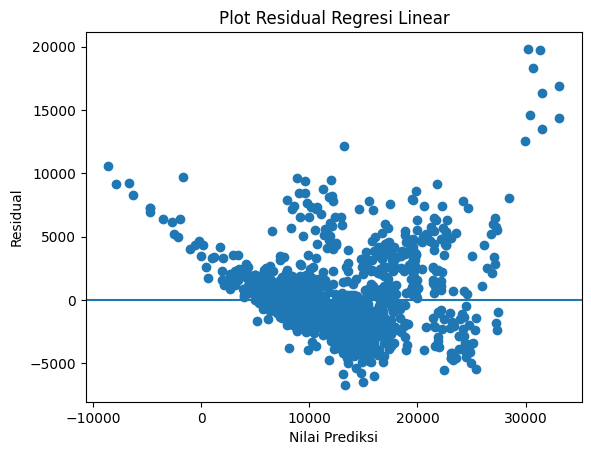

In [51]:
#Analisis residual
import matplotlib.pyplot as plt

residual = y_test - y_pred

# Scatter plot residual
plt.figure()
plt.scatter(y_pred, residual)
plt.axhline(0)
plt.xlabel("Nilai Prediksi")
plt.ylabel("Residual")
plt.title("Plot Residual Regresi Linear")
plt.show()


In [52]:
#Evaluasi Model
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
import numpy as np

# MAE
mae = mean_absolute_error(y_test, y_pred)

# MSE
mse = mean_squared_error(y_test, y_pred)

# RMSE
rmse = np.sqrt(mse)

# R-Squared
r2 = r2_score(y_test, y_pred)

# MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Tampilkan hasil evaluasi
print("=== HASIL EVALUASI MODEL REGRESI LINEAR ===")
print(f"MAE   : {mae:.2f}")
print(f"MSE   : {mse:.2f}")
print(f"RMSE  : {rmse:.2f}")
print(f"R²    : {r2:.4f}")
print(f"MAPE  : {mape:.2f}%")


=== HASIL EVALUASI MODEL REGRESI LINEAR ===
MAE   : 2186.71
MSE   : 9460226.75
RMSE  : 3075.75
R²    : 0.7715
MAPE  : 19.76%


In [54]:
# INPUT DATA MANUAL (GOOGLE COLAB)
import numpy as np

print("=== INPUT DATA MOBIL ===")

year = int(input("Masukkan Tahun Mobil        : "))
mileage = float(input("Masukkan Kilometer (Mileage): "))
tax = float(input("Masukkan Pajak Mobil        : "))
mpg = float(input("Masukkan Konsumsi BBM (mpg) : "))
engineSize = float(input("Masukkan Engine Size        : "))

# Susun data sesuai urutan fitur saat training
input_data = np.array([[year, mileage, tax, mpg, engineSize]])

# Prediksi
prediksi_harga = lr.predict(input_data)

print("\n=== HASIL PREDIKSI ===")
print("Estimasi Harga Mobil (Pounds):", prediksi_harga[0])
print("Estimasi Harga Mobil (IDR Juta):", prediksi_harga[0] * 22000 / 1_000_000)


=== INPUT DATA MOBIL ===
Masukkan Tahun Mobil        : 2019
Masukkan Kilometer (Mileage): 5000
Masukkan Pajak Mobil        : 145
Masukkan Konsumsi BBM (mpg) : 46.5
Masukkan Engine Size        : 1.5

=== HASIL PREDIKSI ===
Estimasi Harga Mobil (Pounds): 15690.586598471738
Estimasi Harga Mobil (IDR Juta): 345.19290516637824


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [55]:
import pickle

# Simpan model
filename = 'estimasi_mobil.sav'
pickle.dump(lr, open(filename, 'wb'))

print("✅ Model berhasil disimpan sebagai estimasi_mobil.sav")

✅ Model berhasil disimpan sebagai estimasi_mobil.sav


In [56]:
%%writefile estimasi_mobil.py
import pickle
import streamlit as st
import numpy as np

# Load model
model = pickle.load(open('estimasi_mobil.sav', 'rb'))

st.title('Estimasi Harga Mobil Bekas')

year = st.number_input('Input Tahun Mobil', min_value=2000, max_value=2030)
mileage = st.number_input('Input Kilometer Mobil')
tax = st.number_input('Input Pajak Mobil')
mpg = st.number_input('Input Konsumsi BBM (mpg)')
engineSize = st.number_input('Input Engine Size')

if st.button('Estimasi Harga'):
    input_data = np.array([[year, mileage, tax, mpg, engineSize]])
    predict = model.predict(input_data)

    st.success(f"Estimasi Harga Mobil Bekas (Pounds): {predict[0]:,.2f}")
    st.success(f"Estimasi Harga Mobil Bekas dalam IDR (Juta): {(predict[0]*22000)/1_000_000:.2f}")

Writing estimasi_mobil.py


In [57]:
%%writefile requirements.txt
streamlit
scikit-learn
numpy

Writing requirements.txt


In [58]:
print("=== STATISTIK DESKRIPTIF ===")
kolom_numerik = ['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']
df[kolom_numerik].describe()

=== STATISTIK DESKRIPTIF ===


,year,price,mileage,tax,mpg,engineSize
count,6699.000000,6699.000000,6699.000000,6699.000000,6699.000000,6699.000000
mean,2016.742797,12529.799074,22889.588745,94.549933,63.078728,1.471996
std,2.205271,6358.562625,19109.288501,73.942649,15.861037,0.435624
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8266.500000,9488.500000,0.000000,55.400000,1.000000
50%,2017.000000,10798.000000,18571.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31059.500000,145.000000,70.600000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6699 entries, 0 to 6698
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6699 non-null   object 
 1   year          6699 non-null   int64  
 2   price         6699 non-null   int64  
 3   transmission  6699 non-null   object 
 4   mileage       6699 non-null   int64  
 5   fuelType      6699 non-null   object 
 6   tax           6699 non-null   int64  
 7   mpg           6699 non-null   float64
 8   engineSize    6699 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 471.2+ KB


<Axes: >

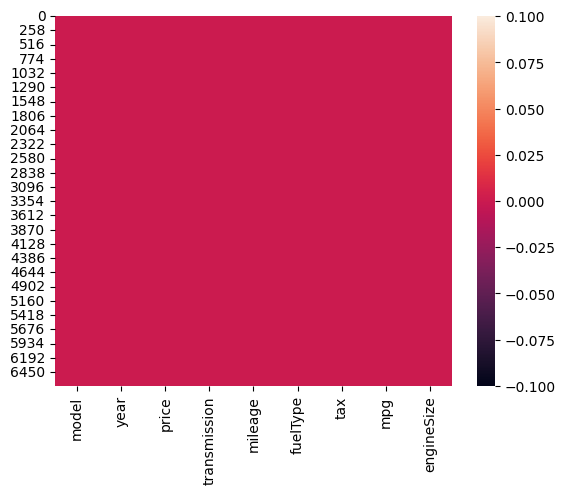

In [26]:
sns.heatmap(df.isnull())

In [63]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,6699.000000,6699.000000,6699.000000,6699.000000,6699.000000,6699.000000
mean,2016.742797,12529.799074,22889.588745,94.549933,63.078728,1.471996
std,2.205271,6358.562625,19109.288501,73.942649,15.861037,0.435624
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8266.500000,9488.500000,0.000000,55.400000,1.000000
50%,2017.000000,10798.000000,18571.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31059.500000,145.000000,70.600000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


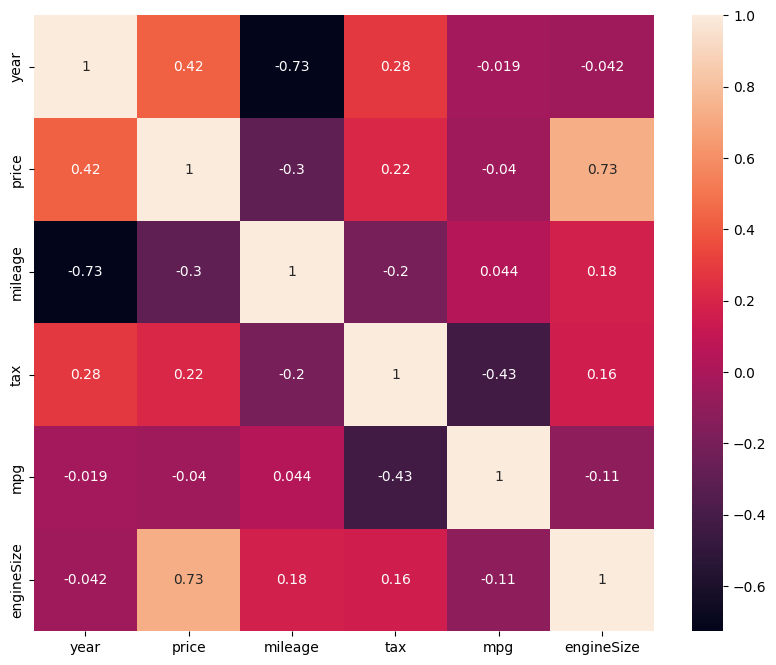

In [64]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.show()


In [65]:
#Jumlah Mobil Berdasarkan Model
models = df.groupby('model').count()[['tax']].sort_values(by='tax',ascending=True).reset_index()
models = models.rename(columns={'tax':'numberOfCars'})

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, 'Verso-S'),
  Text(1, 0, 'Urban Cruiser'),
  Text(2, 0, 'Iq'),
  Text(3, 0, 'Camry'),
  Text(4, 0, 'Supra'),
  Text(5, 0, 'Proace Verso'),
  Text(6, 0, 'Land Cruiser'),
  Text(7, 0, 'Gt86'),
  Text(8, 0, 'Hilux'),
  Text(9, 0, 'Avensis'),
  Text(10, 0, 'Verso'),
  Text(11, 0, 'Prius'),
  Text(12, 0, 'Corolla'),
  Text(13, 0, 'Rav4'),
  Text(14, 0, 'C-Hr'),
  Text(15, 0, 'Auris'),
  Text(16, 0, 'Aygo'),
  Text(17, 0, 'Yaris')])

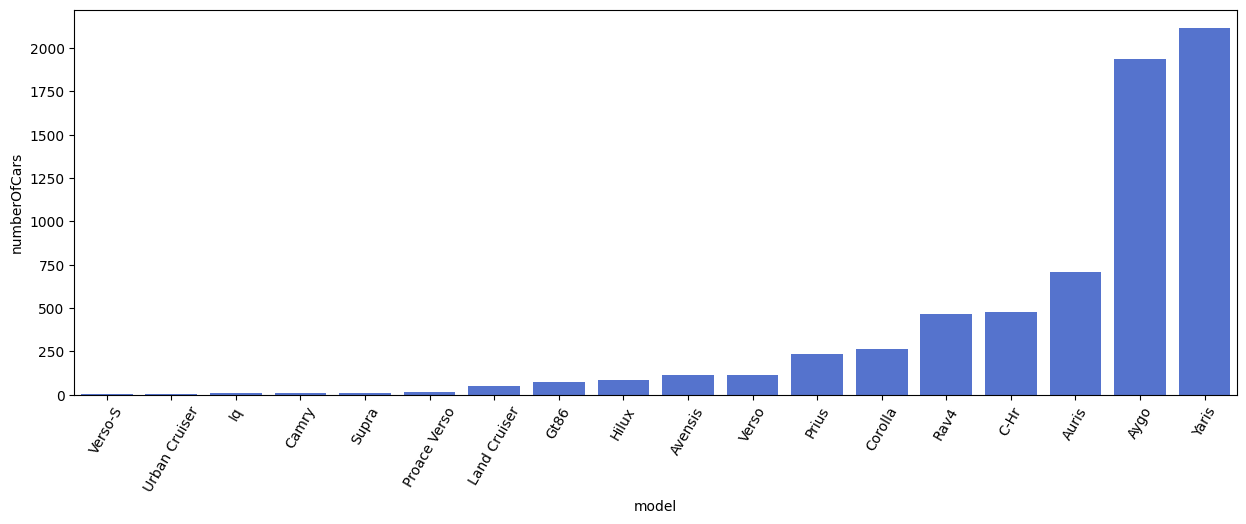

In [66]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['model'], y=models['numberOfCars'], color='royalblue')
plt.xticks(rotation=60)

In [67]:
#Ukuran mesin
engine = df.groupby('engineSize').count()[['tax']].sort_values(by='tax').reset_index()
engine = engine.rename(columns={'tax':'count'})

/tmp/ipython-input-1536017497.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['mileage'])


<Axes: xlabel='mileage', ylabel='Density'>

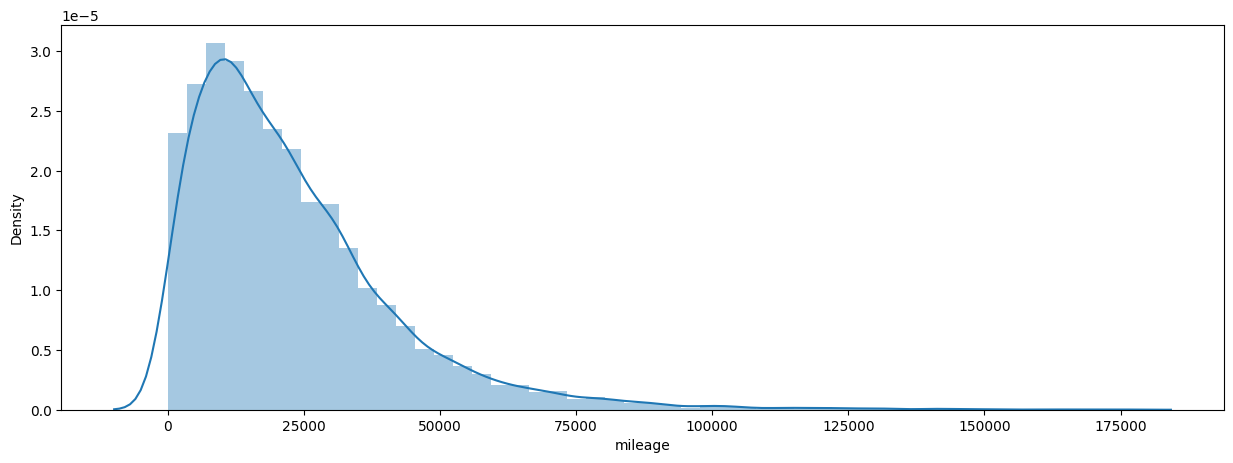

In [68]:
#distribusi mileage
plt.figure(figsize=(15,5))
sns.distplot(df['mileage'])

/tmp/ipython-input-3327799573.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

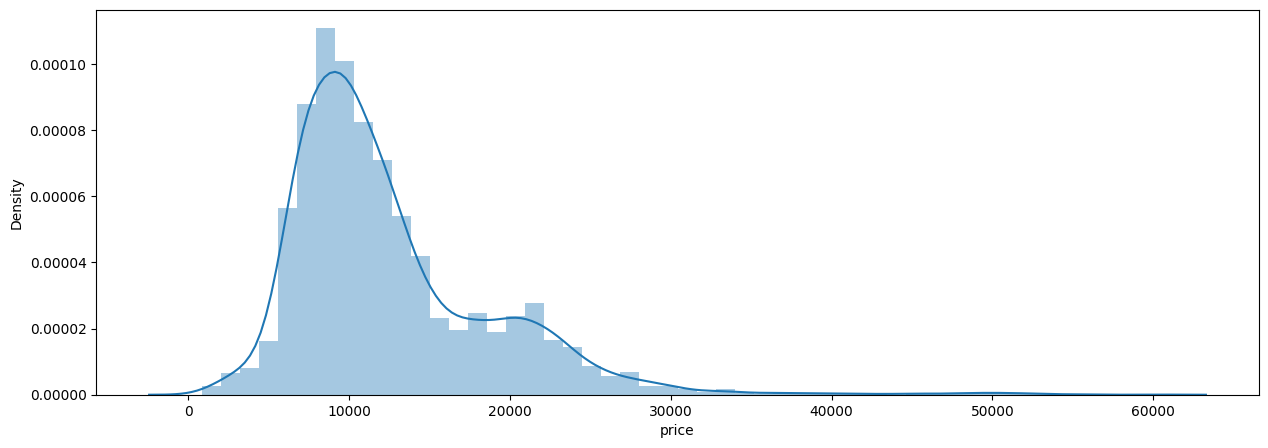

In [69]:
#Distribusi Harga Mobil
plt.figure(figsize=(15,5))
sns.distplot(df['price'])
